In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

In [25]:
cap = cv2.VideoCapture(0)

print("Press SPACE to capture image, ESC to exit")

while True:
    success, frame = cap.read()
    if not success:
        raise RuntimeError("Failed to read from camera")

    cv2.imshow("Capture Image", frame)

    key = cv2.waitKey(1) & 0xFF

    if key == 27:  # ESC
        cap.release()
        cv2.destroyAllWindows()
        raise SystemExit("Exited without capture")

    if key == 32:  # SPACE
        captured_frame = frame.copy()
        break

cap.release()
cv2.destroyAllWindows()

# Force window closure (sometimes needed in notebooks)
for i in range(200):
    cv2.waitKey(1)

Press SPACE to capture image, ESC to exit


In [27]:
with mp_hands.Hands(
    static_image_mode=True,   # IMPORTANT: image mode
    max_num_hands=2,
    min_detection_confidence=0.6,
) as hands:

    # Convert BGR → RGB
    image_rgb = cv2.cvtColor(captured_frame, cv2.COLOR_BGR2RGB)

    results = hands.process(image_rgb)

I0000 00:00:1767700544.592685  182333 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1767700544.603090  202532 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1767700544.613195  202530 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [28]:
annotated_image = captured_frame.copy()

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )

        h, w, _ = annotated_image.shape

        for idx, lm in enumerate(hand_landmarks.landmark):
            px = int(lm.x * w)
            py = int(lm.y * h)

            cv2.putText(
                annotated_image,
                str(idx),
                (px, py),
                cv2.FONT_HERSHEY_TRIPLEX,
                0.5,
                (255, 0, 0),
                1,
                cv2.LINE_AA
            )

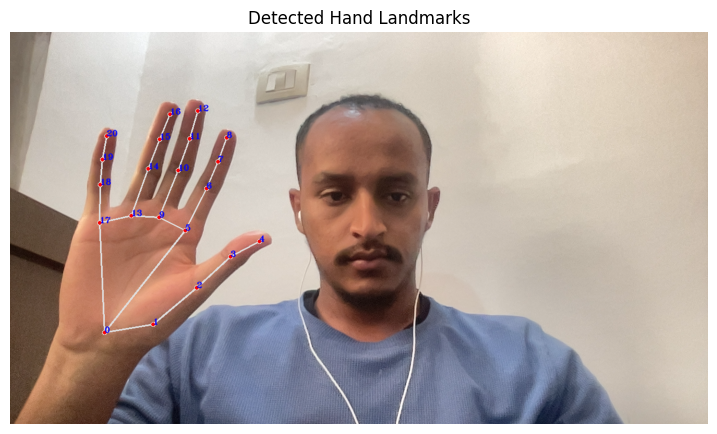

In [29]:
plt.figure(figsize=(9, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Hand Landmarks")
plt.show()

In [30]:
HAND_SECTIONS = {
    "Wrist": [0],
    "Thumb": [1, 2, 3, 4],
    "Index": [5, 6, 7, 8],
    "Middle": [9, 10, 11, 12],
    "Ring": [13, 14, 15, 16],
    "Pinky": [17, 18, 19, 20],
}

In [31]:
h, w, _ = captured_frame.shape
hand_landmarks = results.multi_hand_landmarks[0]  # First detected hand

for section_name, indices in HAND_SECTIONS.items():
    print(f"\n{section_name}")
    for idx in indices:
        lm = hand_landmarks.landmark[idx]

        px = int(lm.x * w)
        py = int(lm.y * h)

        print(
            f"  Landmark {idx:2d}: "
            f"x={lm.x:.3f}, y={lm.y:.3f}, z={lm.z:.3f} | "
            f"px={px}, py={py}"
        )


Wrist
  Landmark  0: x=0.136, y=0.767, z=0.000 | px=173, py=552

Thumb
  Landmark  1: x=0.205, y=0.746, z=-0.027 | px=262, py=537
  Landmark  2: x=0.268, y=0.653, z=-0.033 | px=342, py=470
  Landmark  3: x=0.316, y=0.575, z=-0.036 | px=404, py=413
  Landmark  4: x=0.358, y=0.536, z=-0.040 | px=457, py=385

Index
  Landmark  5: x=0.251, y=0.507, z=-0.012 | px=321, py=365
  Landmark  6: x=0.282, y=0.401, z=-0.024 | px=360, py=288
  Landmark  7: x=0.298, y=0.333, z=-0.037 | px=381, py=239
  Landmark  8: x=0.311, y=0.272, z=-0.048 | px=397, py=195

Middle
  Landmark  9: x=0.214, y=0.475, z=-0.012 | px=273, py=341
  Landmark 10: x=0.241, y=0.355, z=-0.023 | px=308, py=255
  Landmark 11: x=0.257, y=0.274, z=-0.039 | px=329, py=197
  Landmark 12: x=0.269, y=0.204, z=-0.051 | px=344, py=146

Ring
  Landmark 13: x=0.174, y=0.470, z=-0.016 | px=222, py=338
  Landmark 14: x=0.198, y=0.350, z=-0.032 | px=253, py=252
  Landmark 15: x=0.214, y=0.276, z=-0.049 | px=274, py=198
  Landmark 16: x=0.229